In [1]:
from PIL import Image
import cv2
import numpy as np
import imageio
import matplotlib.pyplot as plt

tmp_pred = imageio.volread('/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/01/t006.tif')
tmp_pred = np.array(tmp_pred, dtype=np.single)[None,:,:]
#tmp_pred.shape

tmp_og = imageio.volread('/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Experiments/t047_MSC.tif')
tmp_og = np.array(tmp_og, dtype=np.single)[None,:,:]
#tmp_og.shape

tmp_og2 = imageio.volread('/home/MinaHossain/DMNet_Rina/training_codes/Data/train/DIC-C2DH-HeLa/01/t000.tif')
tmp_og2 = np.array(tmp_og2, dtype=np.single)[None,:,:]
#tmp_og.shape

tmp_gt = imageio.volread('/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Experiments/t298_PSC.tif')
tmp_gt = np.array(tmp_gt, dtype=np.single)[None,:,:]
#tmp_gt.shape

print(tmp_pred.shape)
print(tmp_og.shape)
print(tmp_og2.shape)
print(tmp_gt.shape)

FileNotFoundError: No such file: '/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/01/t006.tif'

In [3]:
tmp = cv2.resize(tmp_og.squeeze(), (0,0), fx=.35, fy=.35)
print(tmp.shape)
plt.imshow(tmp[:256, :256])

NameError: name 'tmp_og' is not defined

(512, 512)


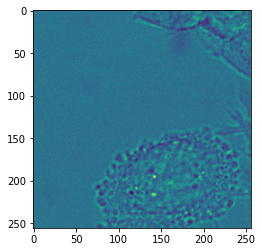

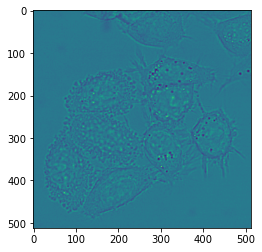

In [3]:

tmp = cv2.resize(tmp_og2.squeeze(), (0,0), fx=1, fy=1)
print(tmp.shape)
plt.imshow(tmp[:256, :256])
plt.show()
plt.imshow(tmp)

(1728, 2160)


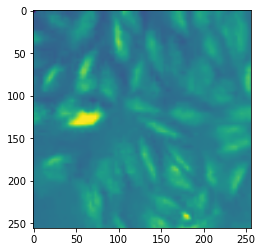

In [4]:
tmp = cv2.resize(tmp_gt.squeeze(), (0,0), fx=3, fy=3)
print(tmp.shape)
plt.imshow(tmp[:256, :256])

(801, 801)


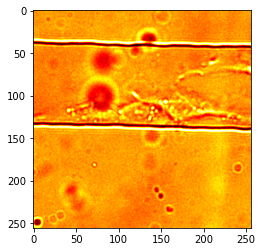

In [5]:
scale=.55
r=150
c=800
tmp = cv2.resize(tmp_pred.squeeze(), (0,0), fx=scale, fy=scale)
print(tmp.shape)
plt.imshow(tmp[int(scale*r):int(scale*r)+256, int(scale*c):int(scale*c)+256], cmap='hot')

In [1]:
import matplotlib.pyplot as plt
plt.imshow(tmp, cmap='hot')
# plt.imshow(tmp, cmap='Set1')


NameError: name 'tmp' is not defined

In [7]:
from PIL import Image
import cv2
import numpy as np
import imageio
import matplotlib.pyplot as plt

tmp_pred = imageio.volread('/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data/01_ST/SEG/man_seg000.tif')
tmp_pred = np.array(tmp_pred, dtype=np.single)[None,:,:]
#tmp_pred.shape

tmp_og = imageio.volread('/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Experiments/man_seg015_MSC.tif')
tmp_og = np.array(tmp_og, dtype=np.single)[None,:,:]
#tmp_og.shape

tmp_og2 = imageio.volread('/home/MinaHossain/DMNet_Rina/training_codes/Data/train/DIC-C2DH-HeLa/01_ST/SEG/man_seg000.tif')
tmp_og2 = np.array(tmp_og2, dtype=np.single)[None,:,:]
#tmp_og.shape

tmp_gt = imageio.volread('/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Experiments/man_seg269_PSC.tif')
tmp_gt = np.array(tmp_gt, dtype=np.single)[None,:,:]
#tmp_gt.shape

print(tmp_pred.shape)
print(tmp_og.shape)
print(tmp_og2.shape)
print(tmp_gt.shape)


(1, 1456, 1456)
(1, 832, 992)
(1, 512, 512)
(1, 576, 720)


In [8]:
def generate_shapemarker_each(read_mask,kernel_da,min_da):

    dia_mask=np.zeros_like(read_mask)
    for ids in np.unique(read_mask):
        if ids>0:
            area=np.sum(read_mask==ids)
            kernel_size=max(min(int(area*0.015),kernel_da),min_da)
            #print (area,kernel_size)

            kernel = np.ones((kernel_size, kernel_size), np.uint8)

            ids_mask=np.asarray(255*(read_mask==ids),dtype=np.uint8)

            dia_mask = dia_mask+cv2.erode(ids_mask, kernel, iterations=1)


    return dia_mask

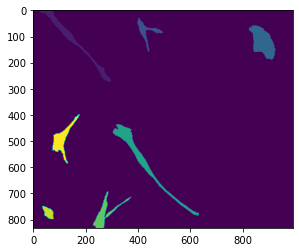

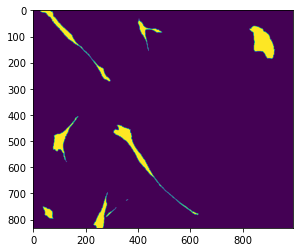

In [9]:
tmp = generate_shapemarker_each(tmp_og.squeeze(), 5, 3)
plt.imshow(tmp_og.squeeze())
plt.show()
plt.imshow(tmp)
plt.show()

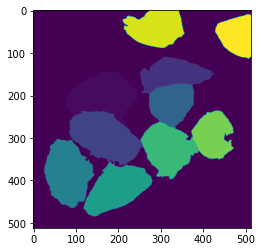

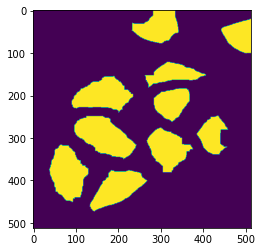

In [10]:
tmp = generate_shapemarker_each(tmp_og2.squeeze(), 20, 3)
plt.imshow(tmp_og2.squeeze())
plt.show()
plt.imshow(tmp)
plt.show()

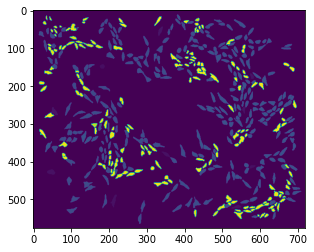

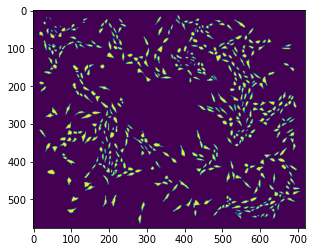

In [11]:
tmp = generate_shapemarker_each(tmp_gt.squeeze(), 3, 3)
plt.imshow(tmp_gt.squeeze())
plt.show()
plt.imshow(tmp)
plt.show()


(576, 720)


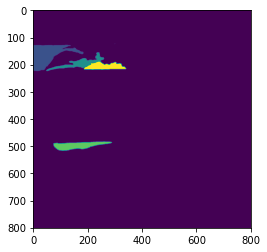

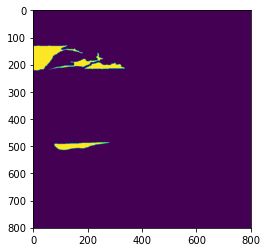

In [12]:
scale=.55
tmp1 = cv2.resize(tmp_pred.squeeze(), (0,0), fx=scale, fy=scale)
print(tmp.shape)
tmp2 = generate_shapemarker_each(tmp1.squeeze(), 5, 5)
plt.imshow(tmp1.squeeze())
plt.show()
plt.imshow(tmp2)
plt.show()